In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/rfm dataset purchase.csv",header=None)

In [ ]:
df.head()

,0,1,2
0,760,25.0,06-11-2009
1,860,50.0,28-09-2012
2,1200,100.0,25-10-2005
3,1420,50.0,09-07-2009
4,1940,70.0,25-01-2013


Customer Id, Value
of Transaction and Date of Transaction

In [ ]:
import pandas as pd

# Suppose you have a DataFrame 'df'
# Rename columns
df.columns = ['Customer Id', 'Value', 'Date']


In [ ]:
df.head()

,Customer Id,Value,Date
0,760,25.0,06-11-2009
1,860,50.0,28-09-2012
2,1200,100.0,25-10-2005
3,1420,50.0,09-07-2009
4,1940,70.0,25-01-2013


In [ ]:
df.info

<bound method DataFrame.info of        Customer Id  Value        Date
0              760   25.0  06-11-2009
1              860   50.0  28-09-2012
2             1200  100.0  25-10-2005
3             1420   50.0  09-07-2009
4             1940   70.0  25-01-2013
...            ...    ...         ...
51238       163230   30.0  12-11-2011
51239       154410  100.0  15-11-2013
51240       189270   30.0  23-12-2014
51241       173810   30.0  28-05-2015
51242         9830   50.0  30-11-2011

[51243 rows x 3 columns]>

In [ ]:
df.shape

(51243, 3)

In [ ]:
df.isnull().sum()

Customer Id    0
Value          0
Date           0
dtype: int64

In [ ]:
#checking unique values
df.nunique()

Customer Id    18417
Value            227
Date            1879
dtype: int64

In [ ]:
# Convert 'Date' column to datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

<ipython-input-11-9199c5c86f7c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Customer Id,Value,Date,Year
0,760,25.0,2009-06-11,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-09-07,2009
4,1940,70.0,2013-01-25,2013


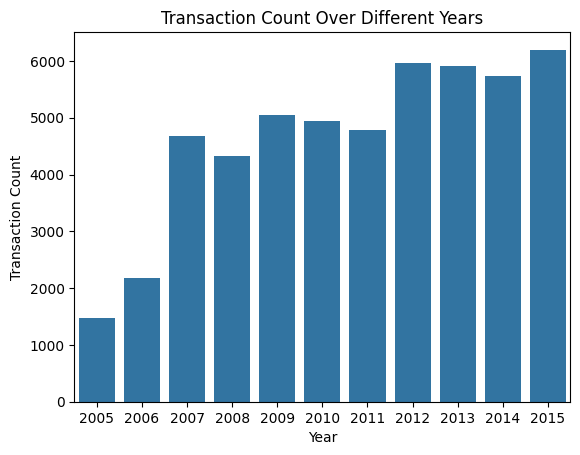

In [ ]:
sns.countplot(data=df, x='Year')

plt.title('Transaction Count Over Different Years')
plt.xlabel('Year')
plt.ylabel('Transaction Count')

# Show the plot
plt.show()

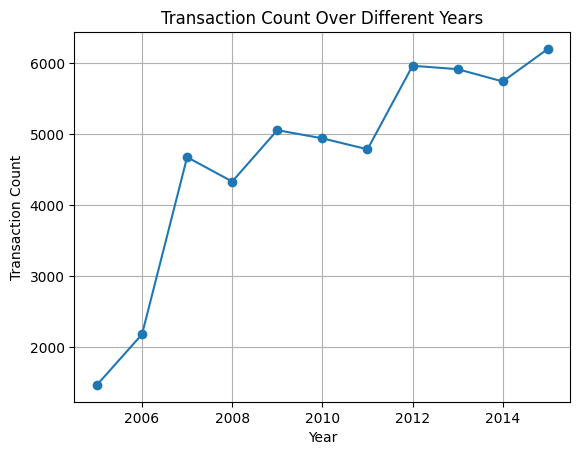

In [ ]:
transaction_counts = df['Year'].value_counts().sort_index()

# Create a line plot
plt.plot(transaction_counts.index, transaction_counts.values, marker='o', linestyle='-')

plt.title('Transaction Count Over Different Years')
plt.xlabel('Year')
plt.ylabel('Transaction Count')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
average_bill_value_per_year = df.groupby('Year')['Value'].mean()

print(average_bill_value_per_year)

Year
2005    55.826122
2006    52.250454
2007    49.264014
2008    53.071780
2009    50.745253
2010    58.740012
2011    63.519300
2012    62.913312
2013    67.931357
2014    75.390347
2015    77.197697
Name: Value, dtype: float64


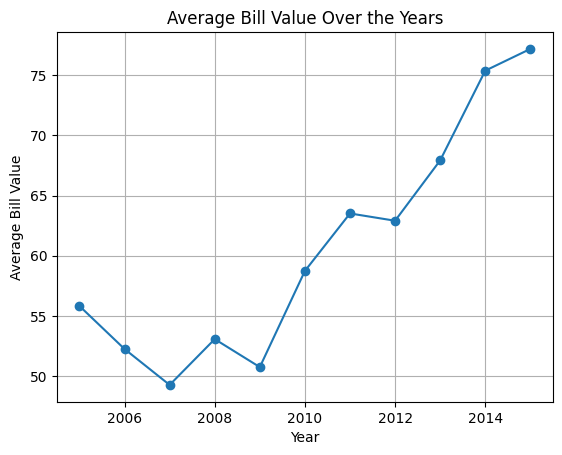

In [ ]:
average_bill_value_per_year = df.groupby('Year')['Value'].mean()

# Plot the average bill value over the years
plt.plot(average_bill_value_per_year.index, average_bill_value_per_year.values, marker='o')

# Add title and labels
plt.title('Average Bill Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Bill Value')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
total_sales_value_per_year = df.groupby('Year')['Value'].sum()

print(total_sales_value_per_year)

Year
2005     82064.40
2006    114010.49
2007    230260.00
2008    229853.88
2009    256466.51
2010    290116.92
2011    303939.85
2012    374963.34
2013    401610.18
2014    432665.20
2015    478394.13
Name: Value, dtype: float64


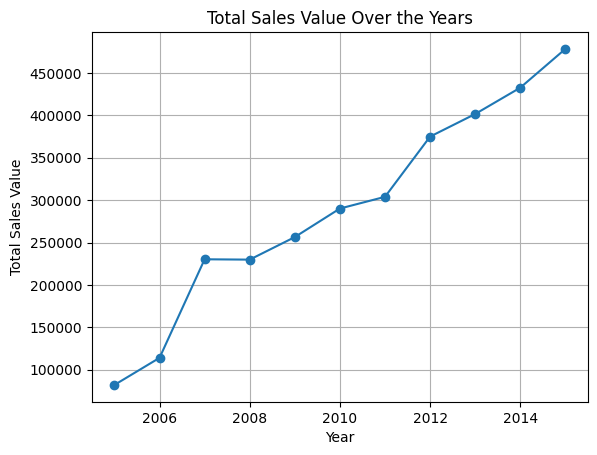

In [ ]:
total_sales_value_per_year = df.groupby('Year')['Value'].sum()

# Plot the total sales value over the years
plt.plot(total_sales_value_per_year.index, total_sales_value_per_year.values, marker='o')

# Add title and labels
plt.title('Total Sales Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales Value')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.head()

,Customer Id,Value,Date,Year
0,760,25.0,2009-06-11,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-09-07,2009
4,1940,70.0,2013-01-25,2013


In [ ]:
df.drop(columns=['Year'],inplace=True)

In [ ]:
df.head()

,Customer Id,Value,Date
0,760,25.0,2009-06-11
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-09-07
4,1940,70.0,2013-01-25


In [ ]:
df['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [ ]:
import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
now = dt.datetime(2016,1,1)

# RFM Table

In [ ]:
rfm_df = df.groupby('Customer Id').agg({'Date': lambda x: (now - x.max()).days})

In [ ]:
rfm_df['Frequency'] = df.groupby(by=['Customer Id'])['Date'].count()

In [ ]:
rfm_df['MonetaryValue'] = df.groupby(by='Customer Id').agg({'Value': 'mean'})

In [ ]:
rfm_df.head()

,Customer Id,Recency,Frequency,MonetaryValue
0,10,3799,1,30.000000
1,80,343,7,71.428571
2,90,994,10,115.800000
3,120,1459,1,20.000000
4,130,2970,2,50.000000


In [ ]:
sorted_rfm_df = rfm_df.sort_values(by='Frequency', ascending=False)

# Display the sorted DataFrame
sorted_rfm_df

,Customer Id,Recency,Frequency,MonetaryValue
457,9720,62,45,44.555556
6978,109370,1,41,16.951220
7868,119430,212,38,14.760526
534,10720,34,37,26.216216
526,10640,36,34,16.564706
...,...,...,...,...
9588,140980,2047,1,15.000000
9590,141020,2046,1,10.000000
9593,141050,2046,1,40.000000
9597,141090,2046,1,20.000000


In [ ]:
rfm_df['Recency'].median()

1071.0

In [ ]:
rfm_df['Frequency'].median()

2.0

In [ ]:
rfm_df['MonetaryValue'].mean()

57.79298510181561

In [ ]:
rfm_df.rename(columns={'Date': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
Customer Id,,,
10,3799,1,30.000000
80,343,7,71.428571
90,994,10,115.800000
120,1459,1,20.000000
130,2970,2,50.000000


In [ ]:
rfm_df.reset_index(inplace = True)

In [ ]:
rfm_df

,Customer Id,Recency,Frequency,MonetaryValue
0,10,3799,1,30.000000
1,80,343,7,71.428571
2,90,994,10,115.800000
3,120,1459,1,20.000000
4,130,2970,2,50.000000
...,...,...,...,...
18412,263820,1,1,10.000000
18413,263870,135,1,50.000000
18414,263880,34,1,20.000000
18415,263890,5,1,54.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Extract the RFM columns for standardization
rfm_values = rfm_df[['Recency', 'Frequency', 'MonetaryValue']]

# Standardize the RFM values
scaler = StandardScaler()
standardized_rfm_values = scaler.fit_transform(rfm_values)

# Create a new DataFrame with standardized values
df_standardized_rfm = pd.DataFrame(standardized_rfm_values, columns=['Standardized_Recency', 'Standardized_Frequency', 'Standardized_MonetaryValue'], index=rfm_df.index)

# Concatenate the standardized RFM values with the original DataFrame
rfm_standardized = pd.concat([rfm_df, df_standardized_rfm], axis=1)

# Reset the index if you want to keep 'Customer Id' as a regular column
# rfm_standardized.reset_index(inplace=True)



In [ ]:
df_standardized_rfm

,Standardized_Recency,Standardized_Frequency,Standardized_MonetaryValue
0,2.353510,-0.606909,-0.180058
1,-0.858195,1.436125,0.088339
2,-0.253212,2.457642,0.375800
3,0.178918,-0.606909,-0.244843
4,1.583110,-0.266403,-0.050487
...,...,...,...
18412,-1.176020,-0.606909,-0.309628
18413,-1.051492,-0.606909,-0.050487
18414,-1.145353,-0.606909,-0.244843
18415,-1.172303,-0.606909,-0.024573


In [ ]:
# Display the resulting DataFrame with standardized values
rfm_standardized

,Customer Id,Recency,Frequency,MonetaryValue,Standardized_Recency,Standardized_Frequency,Standardized_MonetaryValue
0,10,3799,1,30.000000,2.353510,-0.606909,-0.180058
1,80,343,7,71.428571,-0.858195,1.436125,0.088339
2,90,994,10,115.800000,-0.253212,2.457642,0.375800
3,120,1459,1,20.000000,0.178918,-0.606909,-0.244843
4,130,2970,2,50.000000,1.583110,-0.266403,-0.050487
...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,-1.176020,-0.606909,-0.309628
18413,263870,135,1,50.000000,-1.051492,-0.606909,-0.050487
18414,263880,34,1,20.000000,-1.145353,-0.606909,-0.244843
18415,263890,5,1,54.000000,-1.172303,-0.606909,-0.024573


## Part 1 - Using K means clustering on the RFM data

### Applying K Means clustering

In [ ]:
# Apply K-Means clustering on the standardized data
kmeans = KMeans(n_clusters=8, random_state=42)
rfm_standardized['Cluster'] = kmeans.fit_predict(df_standardized_rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
rfm_standardized

,Customer Id,Recency,Frequency,MonetaryValue,Standardized_Recency,Standardized_Frequency,Standardized_MonetaryValue,Cluster
0,10,3799,1,30.000000,2.353510,-0.606909,-0.180058,1
1,80,343,7,71.428571,-0.858195,1.436125,0.088339,0
2,90,994,10,115.800000,-0.253212,2.457642,0.375800,5
3,120,1459,1,20.000000,0.178918,-0.606909,-0.244843,4
4,130,2970,2,50.000000,1.583110,-0.266403,-0.050487,1
...,...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,-1.176020,-0.606909,-0.309628,3
18413,263870,135,1,50.000000,-1.051492,-0.606909,-0.050487,3
18414,263880,34,1,20.000000,-1.145353,-0.606909,-0.244843,3
18415,263890,5,1,54.000000,-1.172303,-0.606909,-0.024573,3


In [ ]:
cluster_counts = rfm_standardized['Cluster'].value_counts()

# Display the count of customers in each cluster
print(cluster_counts)


3    5602
4    4839
1    3957
0    2716
5    1069
7     172
6      49
2      13
Name: Cluster, dtype: int64


In [ ]:
# Assuming df is your DataFrame with the cluster assignments
# Group by 'Cluster' and calculate the mean for each cluster
cluster_means = rfm_standardized.groupby('Cluster').mean()

# Display the mean values for each cluster
cluster_means.drop(['Customer Id'],axis = 1, inplace = True)
cluster_means.drop(['Standardized_Recency','Standardized_Frequency','Standardized_MonetaryValue'],axis = 1, inplace = True)



cluster_means

,Recency,Frequency,MonetaryValue
Cluster,,,
0,418.276510,5.691458,53.574276
1,2901.955016,1.329543,35.717447
2,803.769231,2.307692,3603.365385
3,408.040164,1.579257,47.041625
4,1638.730936,1.794172,39.516119
5,255.900842,11.576239,60.854714
6,1391.938776,2.408163,1796.732012
7,800.470930,2.744186,714.236880


In [ ]:
rfm_standardized

,Customer Id,Recency,Frequency,MonetaryValue,Standardized_Recency,Standardized_Frequency,Standardized_MonetaryValue,Cluster
0,10,3799,1,30.000000,2.353510,-0.606909,-0.180058,1
1,80,343,7,71.428571,-0.858195,1.436125,0.088339,0
2,90,994,10,115.800000,-0.253212,2.457642,0.375800,5
3,120,1459,1,20.000000,0.178918,-0.606909,-0.244843,4
4,130,2970,2,50.000000,1.583110,-0.266403,-0.050487,1
...,...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,-1.176020,-0.606909,-0.309628,3
18413,263870,135,1,50.000000,-1.051492,-0.606909,-0.050487,3
18414,263880,34,1,20.000000,-1.145353,-0.606909,-0.244843,3
18415,263890,5,1,54.000000,-1.172303,-0.606909,-0.024573,3


In [ ]:
# Assuming df is your DataFrame with the cluster assignments
# Group by 'Cluster' and calculate the mean for each cluster
cluster_medians = rfm_standardized.groupby('Cluster').median()




cluster_medians

,Customer Id,Recency,Frequency,MonetaryValue,Standardized_Recency,Standardized_Frequency,Standardized_MonetaryValue
Cluster,,,,,,,
0,114610.0,265.0,6.0,38.333333,-0.930681,1.095620,-0.126070
1,82050.0,2907.0,1.0,30.000000,1.524563,-0.606909,-0.180058
2,187390.0,359.0,1.0,4000.000000,-0.843326,-0.606909,25.539720
3,215800.0,366.0,1.0,30.000000,-0.836821,-0.606909,-0.180058
4,141740.0,1573.0,1.0,30.000000,0.284860,-0.606909,-0.180058
5,55710.0,129.0,10.0,42.222222,-1.057068,2.457642,-0.100876
6,141430.0,1086.0,1.0,1816.940000,-0.167716,-0.606909,11.396693
7,172370.0,379.5,1.0,600.875000,-0.824275,-0.606909,3.518375


In [ ]:

# Display the mean values for each cluster
cluster_medians.drop(['Customer Id'],axis = 1, inplace = True)
cluster_medians.drop(['Standardized_Recency','Standardized_Frequency','Standardized_MonetaryValue'],axis = 1, inplace = True)
cluster_medians

,Recency,Frequency,MonetaryValue
Cluster,,,
0,265.0,6.0,38.333333
1,2907.0,1.0,30.000000
2,359.0,1.0,4000.000000
3,366.0,1.0,30.000000
4,1573.0,1.0,30.000000
5,129.0,10.0,42.222222
6,1086.0,1.0,1816.940000
7,379.5,1.0,600.875000


from matplotlib import pyplot as plt
cluster_medians['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians['MonetaryValue'].plot(kind='hist', bins=20, title='MonetaryValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians.plot(kind='scatter', x='Frequency', y='MonetaryValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_medians['MonetaryValue'].plot(kind='line', figsize=(8, 4), title='MonetaryValue')
plt.gca().spines[['top', 'right']].set_visible(False)

Cluster Sizes:
3    5602
4    4839
1    3957
0    2716
5    1069
7     172
6      49
2      13
Name: Cluster, dtype: int64


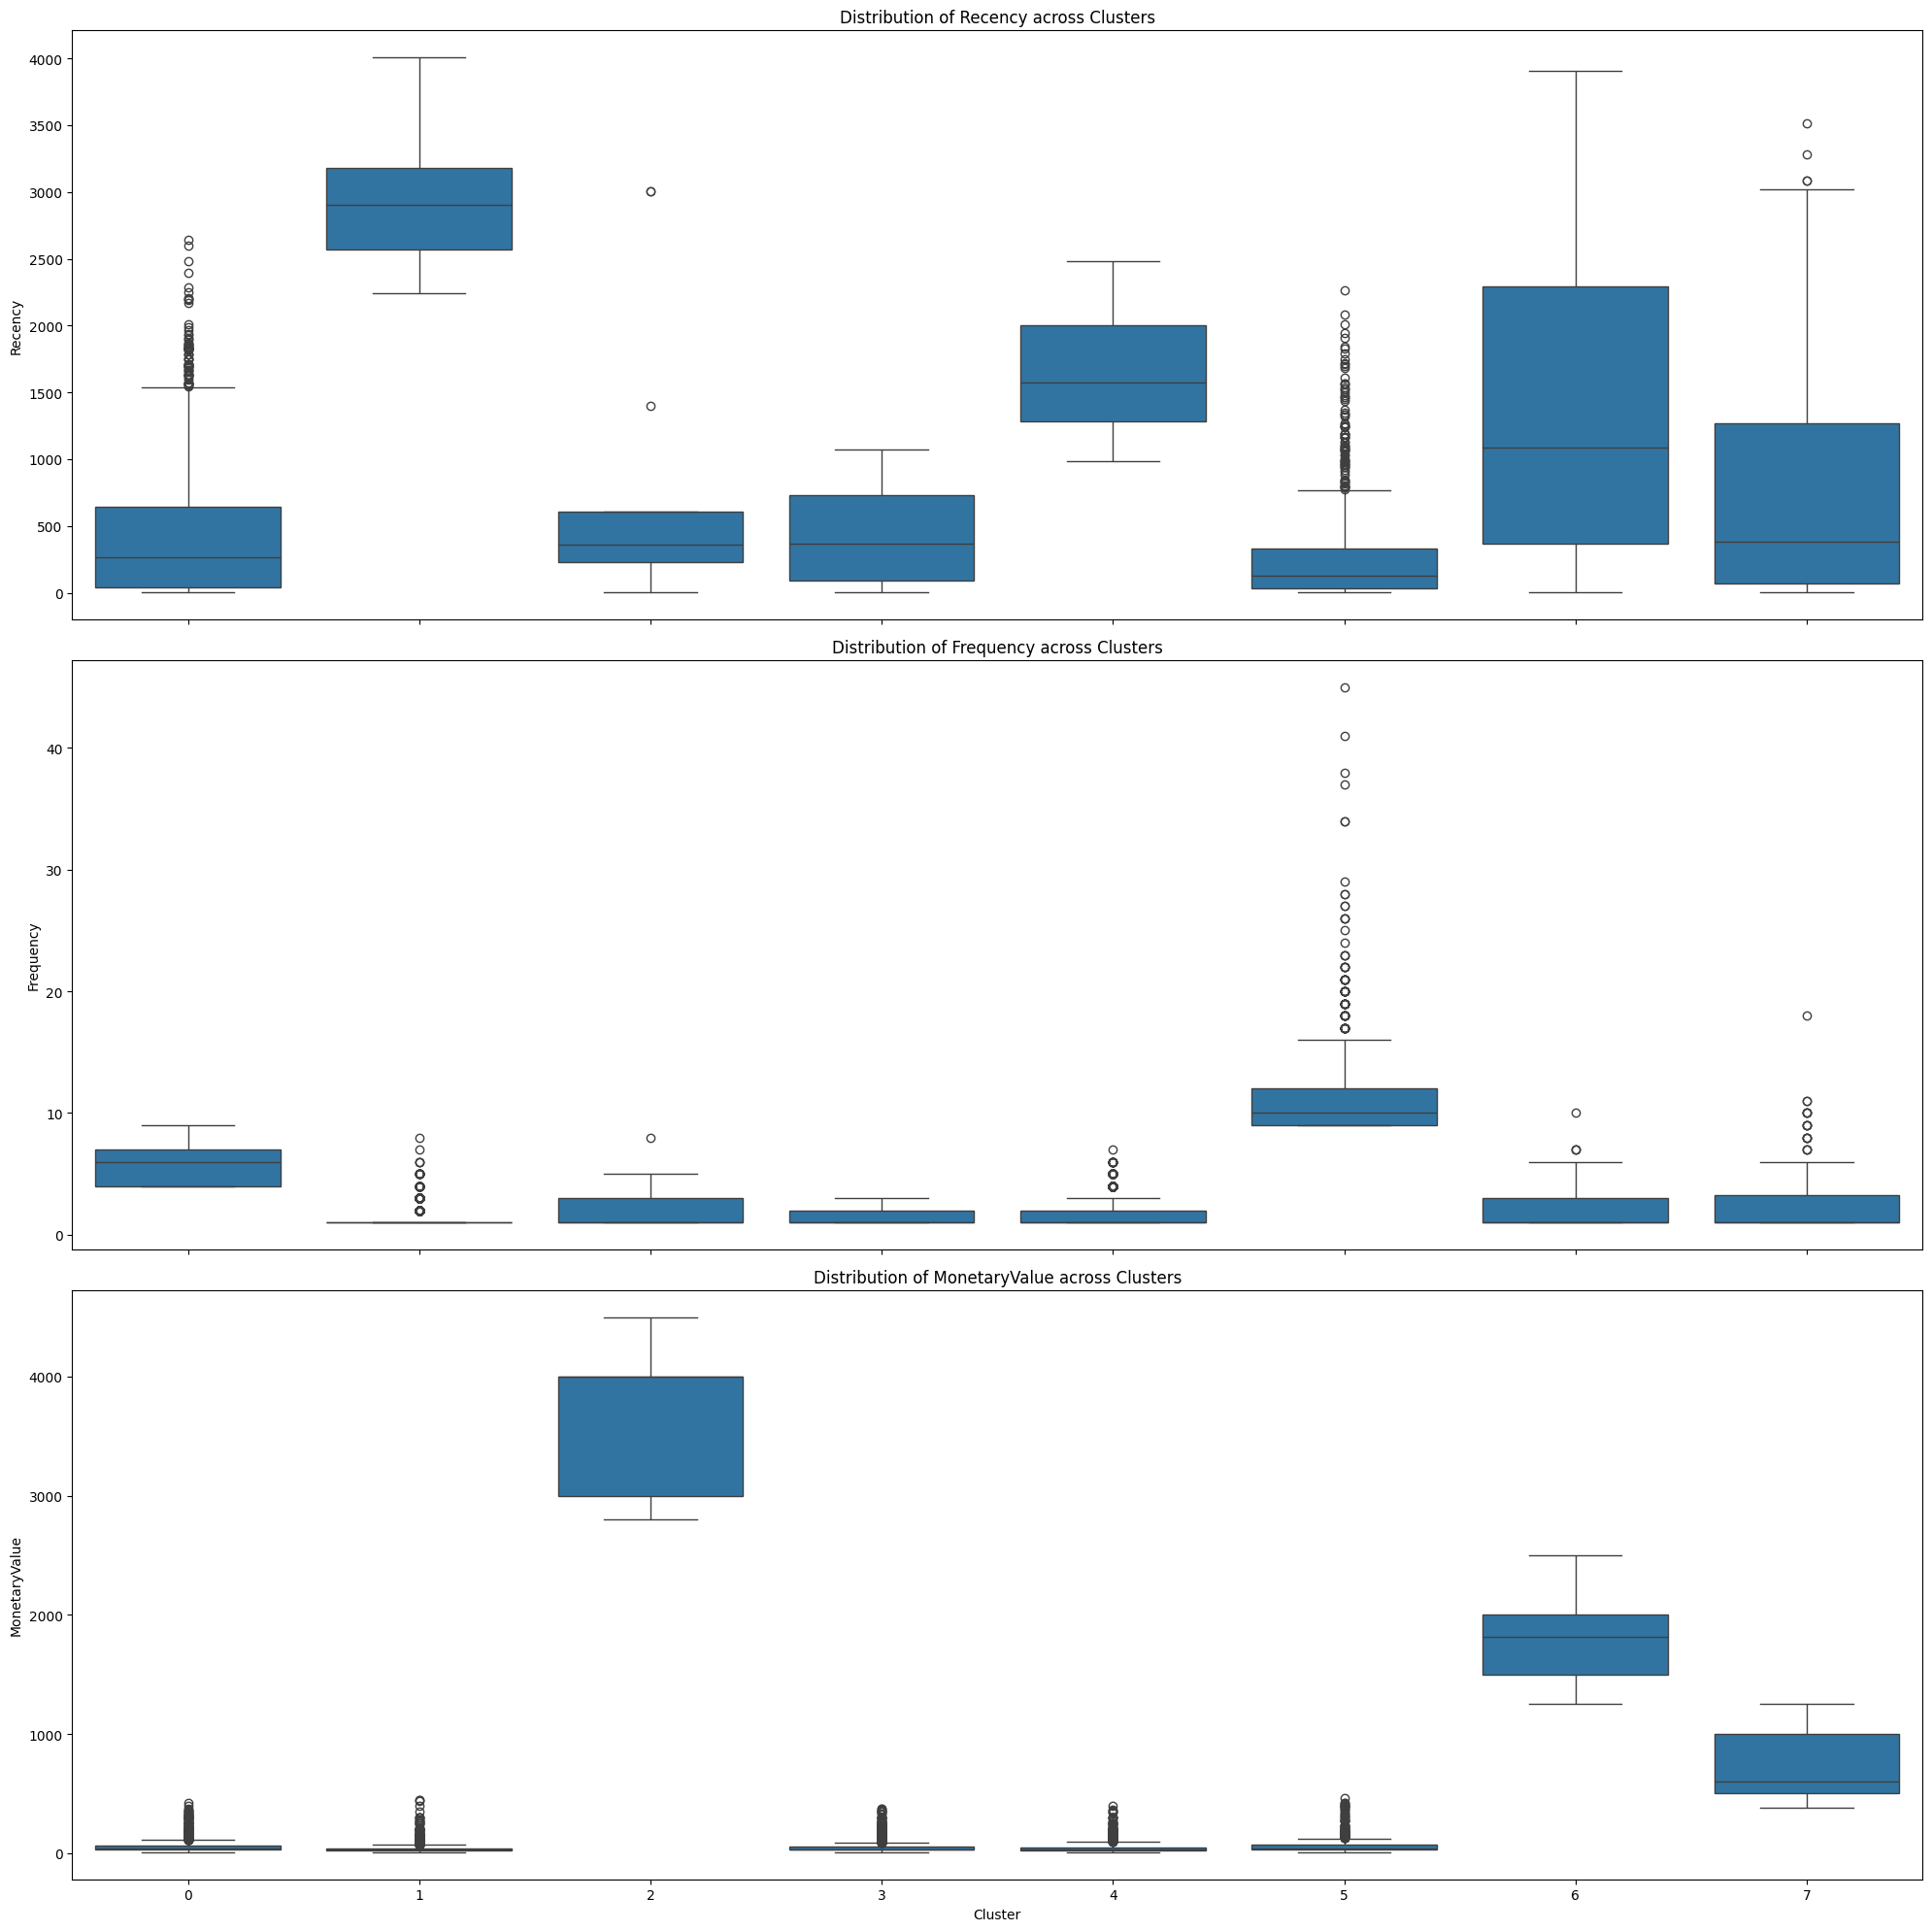

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each cluster
cluster_sizes = rfm_standardized['Cluster'].value_counts()

# Display the number of customers in each cluster
print("Cluster Sizes:")
print(cluster_sizes)

# Plotting the distribution of Recency, Frequency, and MonetaryValue for each cluster
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20), sharex=True)

for i, feature in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    sns.boxplot(x='Cluster', y=feature, data=rfm_standardized, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} across Clusters')

plt.xlabel('Cluster')
plt.tight_layout()
plt.show()


##**RFM Scoring Method**

In [ ]:
rfm_df

,Customer Id,Recency,Frequency,MonetaryValue
0,10,3799,1,30.000000
1,80,343,7,71.428571
2,90,994,10,115.800000
3,120,1459,1,20.000000
4,130,2970,2,50.000000
...,...,...,...,...
18412,263820,1,1,10.000000
18413,263870,135,1,50.000000
18414,263880,34,1,20.000000
18415,263890,5,1,54.000000


In [ ]:
rfm_df.info

<bound method DataFrame.info of        Customer Id  Recency  Frequency  MonetaryValue
0               10     3799          1      30.000000
1               80      343          7      71.428571
2               90      994         10     115.800000
3              120     1459          1      20.000000
4              130     2970          2      50.000000
...            ...      ...        ...            ...
18412       263820        1          1      10.000000
18413       263870      135          1      50.000000
18414       263880       34          1      20.000000
18415       263890        5          1      54.000000
18416       264200        1          1     500.000000

[18417 rows x 4 columns]>

In [ ]:
rfm_score = rfm_df.copy()

In [ ]:
rfm_score

,Customer Id,Recency,Frequency,MonetaryValue
0,10,3799,1,30.000000
1,80,343,7,71.428571
2,90,994,10,115.800000
3,120,1459,1,20.000000
4,130,2970,2,50.000000
...,...,...,...,...
18412,263820,1,1,10.000000
18413,263870,135,1,50.000000
18414,263880,34,1,20.000000
18415,263890,5,1,54.000000


In [ ]:
# Define scoring criteria
frequency_bins = [0, 5, 15, float('inf')]
monetary_value_bins = [0, 50, 100, float('inf')]

# Define corresponding score values
score_values_1 = [1, 2, 3]

In [ ]:
# Define scoring criteria
recency_bins = [0, 365, 900, float('inf')]

# Define corresponding score values
score_values_2 = [3, 2, 1]

In [ ]:
rfm_score['R_Score'] = pd.cut(rfm_df['Recency'], bins=recency_bins, labels=score_values_2, right=False)
rfm_score['F_Score'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=score_values_1, right=False)
rfm_score['M_Score'] = pd.cut(rfm_df['MonetaryValue'], bins=monetary_value_bins, labels=score_values_1, right=False)

In [ ]:
rfm_score

,Customer Id,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
0,10,3799,1,30.000000,1,1,1
1,80,343,7,71.428571,3,2,2
2,90,994,10,115.800000,1,2,3
3,120,1459,1,20.000000,1,1,1
4,130,2970,2,50.000000,1,1,2
...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,3,1,1
18413,263870,135,1,50.000000,3,1,2
18414,263880,34,1,20.000000,3,1,1
18415,263890,5,1,54.000000,3,1,2


In [ ]:
rfm_score['R_Score'] = pd.to_numeric(rfm_score['R_Score'])
rfm_score['F_Score'] = pd.to_numeric(rfm_score['F_Score'])
rfm_score['M_Score'] = pd.to_numeric(rfm_score['M_Score'])

In [ ]:
rfm_score['Final_Score'] = rfm_score['R_Score'] * 100 + rfm_score['F_Score'] * 10 + rfm_score['M_Score']


In [ ]:
rfm_score

,Customer Id,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,Final_Score
0,10,3799,1,30.000000,1,1,1,111
1,80,343,7,71.428571,3,2,2,322
2,90,994,10,115.800000,1,2,3,123
3,120,1459,1,20.000000,1,1,1,111
4,130,2970,2,50.000000,1,1,2,112
...,...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,3,1,1,311
18413,263870,135,1,50.000000,3,1,2,312
18414,263880,34,1,20.000000,3,1,1,311
18415,263890,5,1,54.000000,3,1,2,312


In [ ]:
rfm_score_final = rfm_score.copy()

In [ ]:
rfm_score_final.drop(['Recency','Frequency','MonetaryValue'],axis = 1, inplace = True)

In [ ]:
rfm_score_final

,Customer Id,R_Score,F_Score,M_Score,Final_Score
0,10,1,1,1,111
1,80,3,2,2,322
2,90,1,2,3,123
3,120,1,1,1,111
4,130,1,1,2,112
...,...,...,...,...,...
18412,263820,3,1,1,311
18413,263870,3,1,2,312
18414,263880,3,1,1,311
18415,263890,3,1,2,312


In [ ]:
segment_counts = rfm_score_final.groupby(['R_Score', 'F_Score', 'M_Score']).size().reset_index(name='Customer_Count')


In [ ]:
segment_counts


,R_Score,F_Score,M_Score,Customer_Count
0,1,1,1,6921
1,1,1,2,1590
2,1,1,3,734
3,1,2,1,423
4,1,2,2,123
5,1,2,3,72
6,1,3,1,4
7,1,3,2,1
8,1,3,3,1
9,2,1,1,1722


In [ ]:
sorted_segment_counts = segment_counts.sort_values(by=['R_Score', 'F_Score', 'M_Score'], ascending=[False, False, False])

In [ ]:
sorted_segment_counts

,R_Score,F_Score,M_Score,Customer_Count
25,3,3,3,12
24,3,3,2,26
23,3,3,1,80
22,3,2,3,310
21,3,2,2,529
20,3,2,1,1130
19,3,1,3,514
18,3,1,2,711
17,3,1,1,2086
16,2,3,2,8


In [ ]:
rfm_scored_df = rfm_score.copy()

In [ ]:
rfm_scored_df

,Customer Id,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,Final_Score
0,10,3799,1,30.000000,1,1,1,111
1,80,343,7,71.428571,3,2,2,322
2,90,994,10,115.800000,1,2,3,123
3,120,1459,1,20.000000,1,1,1,111
4,130,2970,2,50.000000,1,1,2,112
...,...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,3,1,1,311
18413,263870,135,1,50.000000,3,1,2,312
18414,263880,34,1,20.000000,3,1,1,311
18415,263890,5,1,54.000000,3,1,2,312


In [ ]:
# Update the segments based on the specified conditions
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 3) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Valued Patrons: Combination 1', '333']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 3) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Valued Patrons: Combination 2', '133']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Valued Patrons: Combination 3', '132']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 2), ['Segment', 'Segment_RFM_Score']] = ['Frequent Shoppers: Combination 4', '322']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 2), ['Segment', 'Segment_RFM_Score']] = ['Frequent Shoppers: Combination 5', '122']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Occasional Big Spenders: Combination 6', '311']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Occasional Big Spenders: Combination 7', '113']  # Corrected
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 2) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Occasional Big Spenders: Combination 8', '213']  # Corrected

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 3) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Bargain Hunters: Combination 9', '331']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 2) & (rfm_scored_df['F_Score'] == 3) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Bargain Hunters: Combination 10', '231']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Potential Prospects: Combination 11', '311']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Potential Prospects: Combination 12', '111']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Engaged Explorers: Combination 13', '321']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 2) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Engaged Explorers: Combination 14', '221']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Engaged Explorers: Combination 15', '121']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 3) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Moderate Spenders: Combination 16', '323']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 2) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Moderate Spenders: Combination 17', '223']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 3), ['Segment', 'Segment_RFM_Score']] = ['Moderate Spenders: Combination 18', '123']

rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 1), ['Segment', 'Segment_RFM_Score']] = ['Infrequent Shoppers: Combination 19', '121']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 1) & (rfm_scored_df['F_Score'] == 1) & (rfm_scored_df['M_Score'] == 2), ['Segment', 'Segment_RFM_Score']] = ['Infrequent Shoppers: Combination 20', '112']
rfm_scored_df.loc[(rfm_scored_df['R_Score'] == 2) & (rfm_scored_df['F_Score'] == 2) & (rfm_scored_df['M_Score'] == 2), ['Segment', 'Segment_RFM_Score']] = ['Infrequent Shoppers: Combination 21', '222']

In [ ]:
rfm_scored_df

,Customer Id,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,Final_Score,Segment,Segment_RFM_Score
0,10,3799,1,30.000000,1,1,1,111,Potential Prospects: Combination 12,111
1,80,343,7,71.428571,3,2,2,322,Frequent Shoppers: Combination 4,322
2,90,994,10,115.800000,1,2,3,123,Moderate Spenders: Combination 18,123
3,120,1459,1,20.000000,1,1,1,111,Potential Prospects: Combination 12,111
4,130,2970,2,50.000000,1,1,2,112,Infrequent Shoppers: Combination 20,112
...,...,...,...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,3,1,1,311,Potential Prospects: Combination 11,311
18413,263870,135,1,50.000000,3,1,2,312,NaN,NaN
18414,263880,34,1,20.000000,3,1,1,311,Potential Prospects: Combination 11,311
18415,263890,5,1,54.000000,3,1,2,312,NaN,NaN


In [ ]:
rfm_scored_df[['Segment', 'Segment_RFM_Score']]

,Segment,Segment_RFM_Score
0,Potential Prospects: Combination 12,111
1,Frequent Shoppers: Combination 4,322
2,Moderate Spenders: Combination 18,123
3,Potential Prospects: Combination 12,111
4,Infrequent Shoppers: Combination 20,112
...,...,...
18412,Potential Prospects: Combination 11,311
18413,NaN,NaN
18414,Potential Prospects: Combination 11,311
18415,NaN,NaN


In [ ]:
# Count the number of customers in each segment
segment_counts = rfm_scored_df.groupby('Segment').size().reset_index(name='Customer_Count')

# Count the composition of each segment based on RFM scores
rfm_composition = rfm_scored_df.groupby(['Segment', 'Segment_RFM_Score']).size().reset_index(name='Composition_Count')


In [ ]:
rfm_composition

,Segment,Segment_RFM_Score,Composition_Count
0,Bargain Hunters: Combination 10,231,9
1,Bargain Hunters: Combination 9,331,80
2,Engaged Explorers: Combination 13,321,1130
3,Engaged Explorers: Combination 14,221,353
4,Frequent Shoppers: Combination 4,322,529
5,Frequent Shoppers: Combination 5,122,123
6,Infrequent Shoppers: Combination 19,121,423
7,Infrequent Shoppers: Combination 20,112,1590
8,Infrequent Shoppers: Combination 21,222,104
9,Moderate Spenders: Combination 16,323,310


In [ ]:
# Sort the rfm_composition DataFrame based on 'Segment_RFM_Score' in-place
rfm_composition.sort_values(by='Segment_RFM_Score', inplace=True)
rfm_composition


,Segment,Segment_RFM_Score,Composition_Count
16,Potential Prospects: Combination 12,111,6921
7,Infrequent Shoppers: Combination 20,112,1590
13,Occasional Big Spenders: Combination 7,113,734
6,Infrequent Shoppers: Combination 19,121,423
5,Frequent Shoppers: Combination 5,122,123
11,Moderate Spenders: Combination 18,123,72
18,Valued Patrons: Combination 2,133,1
14,Occasional Big Spenders: Combination 8,213,294
3,Engaged Explorers: Combination 14,221,353
8,Infrequent Shoppers: Combination 21,222,104
